# Training The Model

In [1]:
import numpy as np
import pandas as pd

from BoW import BoW

## Loading data frame

In [2]:
df = pd.read_csv('data.csv', encoding='utf-8')

df.head()

,id,entity,sentiment,tweet,preprocessed_tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,"I m get borderland murder ,"
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"come border kill ,"
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"I m get borderland kill ,"
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"I m come borderland murder ,"
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"I m get borderland 2 murder ,"


## Creating Model

In [3]:
model = BoW()

### Remove missing values

In [4]:
df.isna().sum()

id                       0
entity                   0
sentiment                0
tweet                    0
preprocessed_tweet    1183
dtype: int64

In [5]:
df.dropna(inplace=True)

<Axes: ylabel='count'>

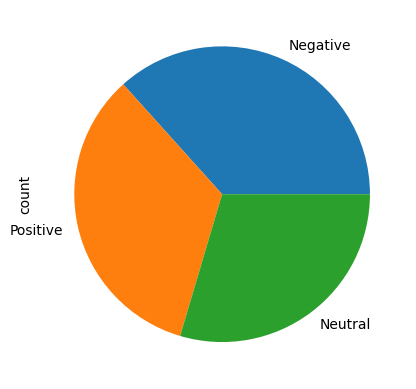

In [6]:
df['sentiment'].value_counts().plot(kind='pie')

## Train the model

In [7]:
X = df['preprocessed_tweet']
y = df['sentiment']
model.train(X, y)


Creating training and testing datasets...

Training...

Performing cross-validation for RandomForest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=  47.4s
[CV] END ....................max_depth=None, n_estimators=50; total time=  47.3s
[CV] END ....................max_depth=None, n_estimators=50; total time=  47.4s
[CV] END ....................max_depth=None, n_estimators=50; total time=  47.9s
[CV] END ....................max_depth=None, n_estimators=50; total time=  47.9s
[CV] END ...................max_depth=None, n_estimators=100; total time= 1.6min
[CV] END ...................max_depth=None, n_estimators=100; total time= 1.6min
[CV] END ...................max_depth=None, n_estimators=100; total time= 1.7min
[CV] END ......................max_depth=10, n_estimators=50; total time=   2.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   2.3s
[CV] END ...............

/Users/batuhanbasak/Development/sentiment-analysis-BoW/virtual-env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ...................max_depth=None, n_estimators=200; total time= 3.4min
[CV] END ...................max_depth=None, n_estimators=200; total time= 3.4min
[CV] END .....................max_depth=30, n_estimators=100; total time=  14.5s
[CV] END .....................max_depth=30, n_estimators=100; total time=  14.5s
[CV] END .....................max_depth=30, n_estimators=200; total time=  28.1s
[CV] END .....................max_depth=30, n_estimators=200; total time=  27.0s
[CV] END .....................max_depth=30, n_estimators=200; total time=  27.2s
[CV] END .....................max_depth=30, n_estimators=200; total time=  26.7s
[CV] END .....................max_depth=30, n_estimators=200; total time=  26.7s
[CV] END ...................max_depth=None, n_estimators=200; total time= 3.2min
[CV] END ...................max_depth=None, n_estimators=200; total time= 3.2min
Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 200}
Best cross-validation score for Ra

## Save model to a file

In [8]:
model.save_to_file('the_model.pkl')

Model saved to the_model.pkl


## Load model from file

In [9]:
model = BoW()
model.load_from_file('the_model.pkl')

Model loaded from the_model.pkl


## Evaluate the model with validation dataset

In [10]:
column_names = ['id', 'entity', 'sentiment', 'tweet']
df = pd.read_csv('./dataset/twitter_validation.csv', names=column_names)
df.head()

,id,entity,sentiment,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [11]:
df = df.loc[df['sentiment'] != 'Irrelevant']

In [12]:
df.isna().sum()

id           0
entity       0
sentiment    0
tweet        0
dtype: int64

In [13]:
from preprocessing import preprocess_text
from tqdm import tqdm

print('\nPreprocessing tweets...')
df['preprocessed_tweet'] = [preprocess_text(text) for text in tqdm(df['tweet'])]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/batuhanbasak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/batuhanbasak/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/batuhanbasak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Preprocessing tweets...


100%|██████████| 828/828 [00:02<00:00, 375.40it/s]


In [14]:
X_val = df['preprocessed_tweet']
y_val = df['sentiment']

y_pred = model.predict(X_val)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

Validation Accuracy: 0.97
